# Project - Pasta Type Image Classification

## the following pasta types will be classified:

- spaghetti
- gnocchi
- penne

### install and import libraries

In [94]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### helper function for plotting model 

In [96]:
def plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### number of epochs

In [97]:
epochs=10

### create training, validation and test dataset

In [156]:
import pathlib
data_dir = pathlib.Path("./images")
image_count = len(list(data_dir.glob('*/*')))
print(f'{image_count} images were loaded')

batch_size = 32
img_height = 180
img_width = 180

print("Training")
train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print("Validation")
validation_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_data_set.class_names
num_classes = len(class_names)
print("Test")
testdata_dir = pathlib.Path("./test_images")
test_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  testdata_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



1266 images were loaded
Training
Found 1266 files belonging to 3 classes.
Using 887 files for training.
Validation
Found 1266 files belonging to 3 classes.
Using 379 files for validation.
Test
Found 15 files belonging to 3 classes.


## improves the performance while training the model

In [112]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_set = train_data_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_data_set = validation_data_set.cache().prefetch(buffer_size=AUTOTUNE)
test_data_set = test_data_set.cache().prefetch(buffer_size=AUTOTUNE)

### check dataset

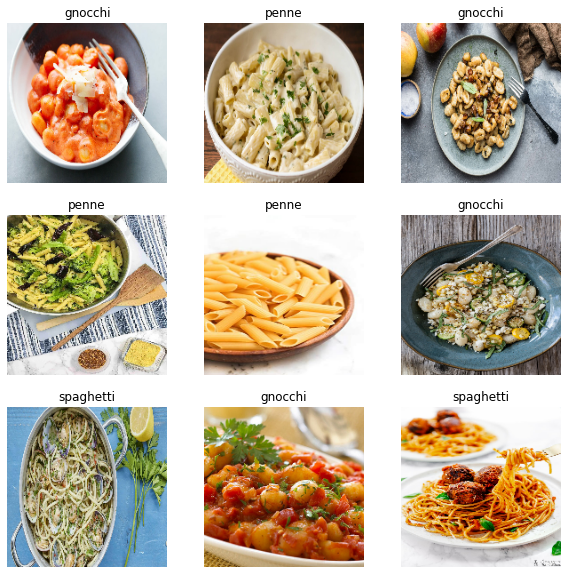

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## create first model

- we added some preprocessing layers to generate more data
    - randomflip
    - randomrotation
    - randomzoom
    

In [101]:
base_learning_rate = 0.001 #adam base learning rate

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_16 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 45, 45, 64)      

### train model

In [102]:
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
28/28 [==============================] - 28s 1s/step - loss: 1.1046 - accuracy: 0.3630 - val_loss: 1.0854 - val_accuracy: 0.4617
Epoch 2/10
28/28 [==============================] - 33s 1s/step - loss: 1.0563 - accuracy: 0.4645 - val_loss: 1.0319 - val_accuracy: 0.4485
Epoch 3/10
28/28 [==============================] - 34s 1s/step - loss: 1.0278 - accuracy: 0.4837 - val_loss: 1.0009 - val_accuracy: 0.4960
Epoch 4/10
28/28 [==============================] - 35s 1s/step - loss: 1.0139 - accuracy: 0.4837 - val_loss: 1.0362 - val_accuracy: 0.4723
Epoch 5/10
28/28 [==============================] - 39s 1s/step - loss: 1.0153 - accuracy: 0.5073 - val_loss: 1.0294 - val_accuracy: 0.4670
Epoch 6/10
28/28 [==============================] - 38s 1s/step - loss: 0.9946 - accuracy: 0.5062 - val_loss: 1.0265 - val_accuracy: 0.4670
Epoch 7/10
28/28 [==============================] - 38s 1s/step - loss: 0.9763 - accuracy: 0.5378 - val_loss: 1.1425 - val_accuracy: 0.4169
Epoch 8/10
28/28 [==

### plot model

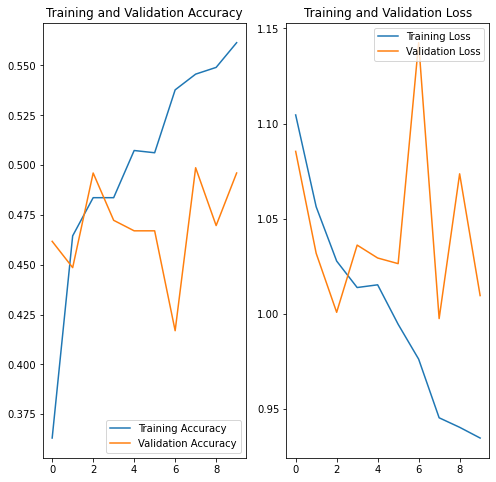

In [103]:
plot(history)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_34 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_23 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 45, 45, 64)      

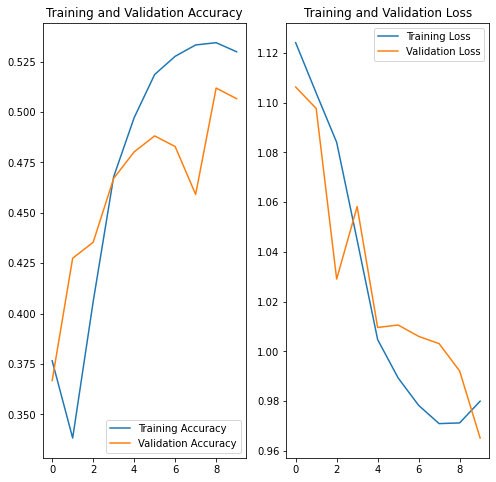

In [110]:
base_learning_rate = 0.0008 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_36 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_24 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 45, 45, 64)      

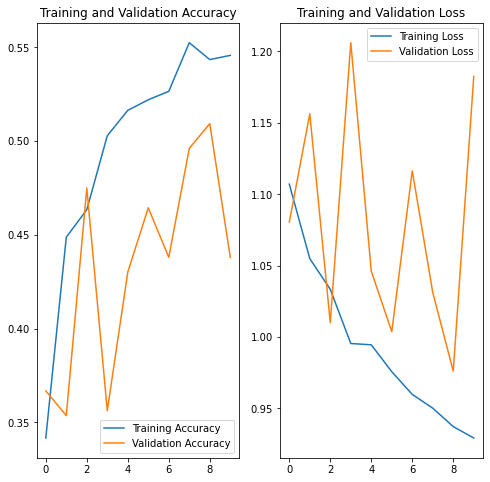

In [111]:
base_learning_rate = 0.0005 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

## Standard

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_26 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 22, 22, 64)      

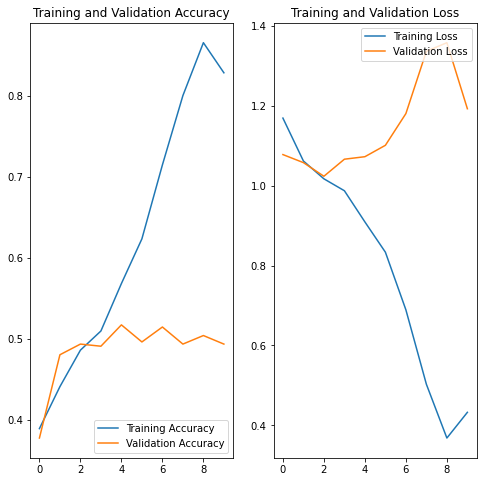

In [114]:
base_learning_rate = 0.001 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  #data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

### data augmentation

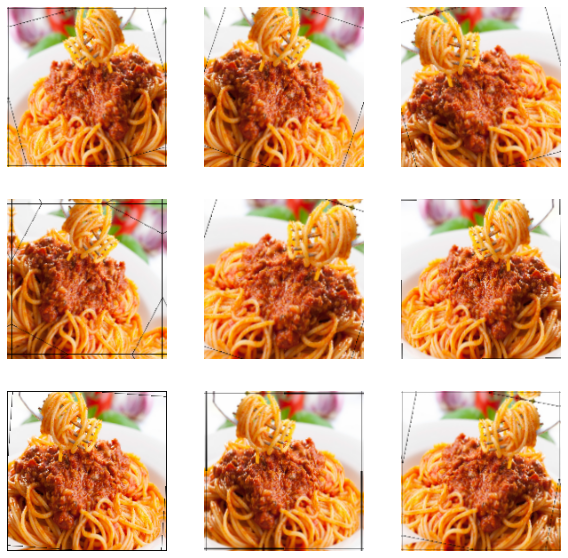

In [118]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_data_set.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_48 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_28 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 45, 45, 64)      

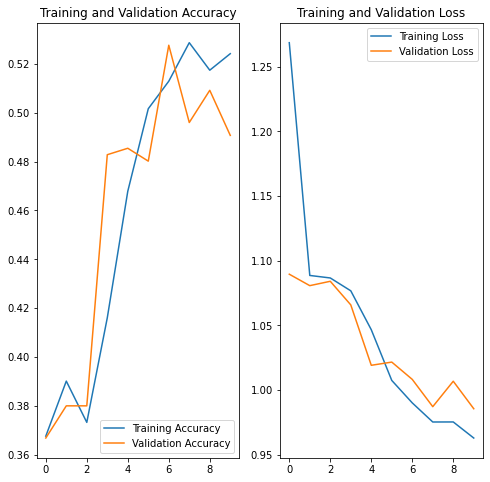

In [120]:
base_learning_rate = 0.001 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_50 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_29 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 45, 45, 64)      

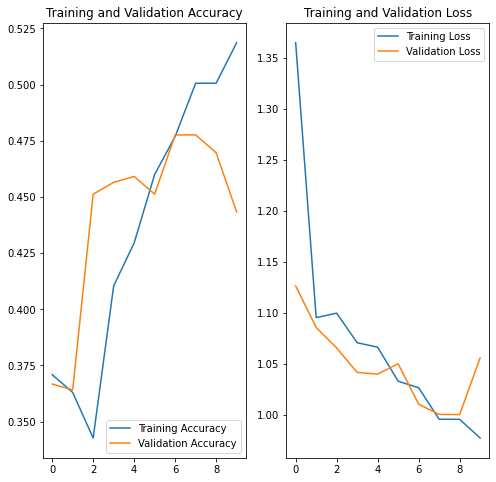

In [121]:
base_learning_rate = 0.0007 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_52 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_30 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 45, 45, 64)      

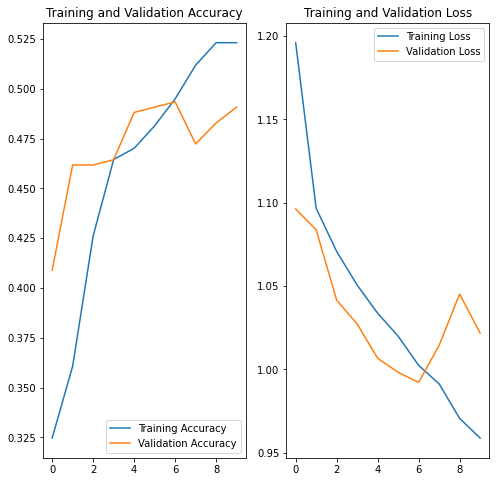

In [122]:
base_learning_rate = 0.0005

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_62 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_35 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 45, 45, 32)      

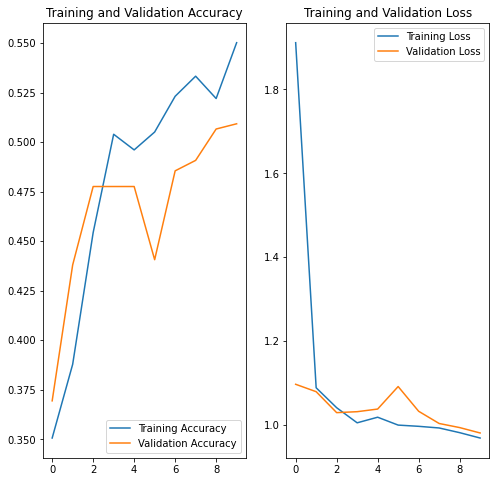

In [127]:
base_learning_rate = 0.001

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_116 (Sequential)  (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_62 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_166 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 45, 45, 32)     

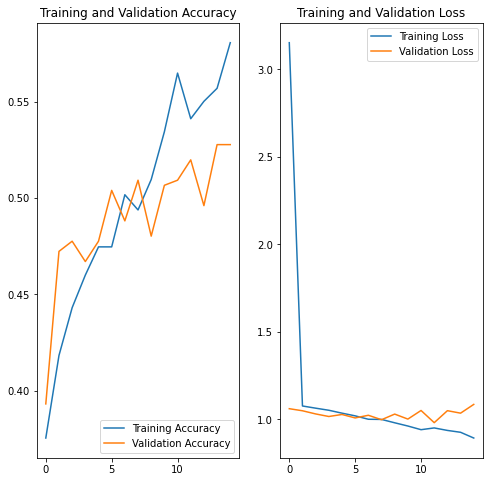

In [154]:
base_learning_rate = 0.001
epochs = 15

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

## predict new data

In [173]:
predictions = model.predict(test_data_set)
# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid_cross_entropy_with_logits(preds, test_data_set.classes)




AttributeError: 'BatchDataset' object has no attribute 'classes'